# APIs and Financial Data Analysis.

Imagine the following scenario: In your new job as a financial wealth advisor, you’ve just been tasked with providing a retirement plan for a new client. You’ve gathered all the information: their investable assets, income, expenses, savings goals, and risk tolerance. You start devising a portfolio—by using the asset prices from 2019. You might have the best financial-planning tools in the world at your disposal, but with stale data, your retirement plan will be retired to the wastebasket.

Having the most up-to-date data that’s available makes up an essential part of a successful financial analysis. With APIs, which are software development tools, you have on-demand access to the most-current data.

In this lesson, you’ll learn how to use APIs to collect data from various financial-data providers, to parse that data, and to convert that data to a Pandas DataFrame. Learning to use APIs will advance your data analysis skills and, as you’ll discover later in this module, allow you even to forecast the future.

In this week's Challenge, you’ll use APIs to import current asset-price information into an application. You’ll then convert the information to a Pandas DataFrame for use in both budget and retirement analyses.

# Introduction to APIs.

APIs are software magic! With APIs, we can access up-to-date data with just a few lines of code. But what, exactly, are APIs?

## APIs and the Client-Server Model.

An application programming interface (API) is a set of functions that applications use to automate the back-and-forth communication between computers.

This communication involves making a call that immediately triggers an exchange between your application and a web service, such as a financial data provider. Your application makes a `request` for the financial data that you need, and the web service sends a `response` that includes that data—for example, interest rates for different time periods.

The `client-server model` defines the exchange between the two computers that an API call involves. The following image illustrates the `client-server model`:

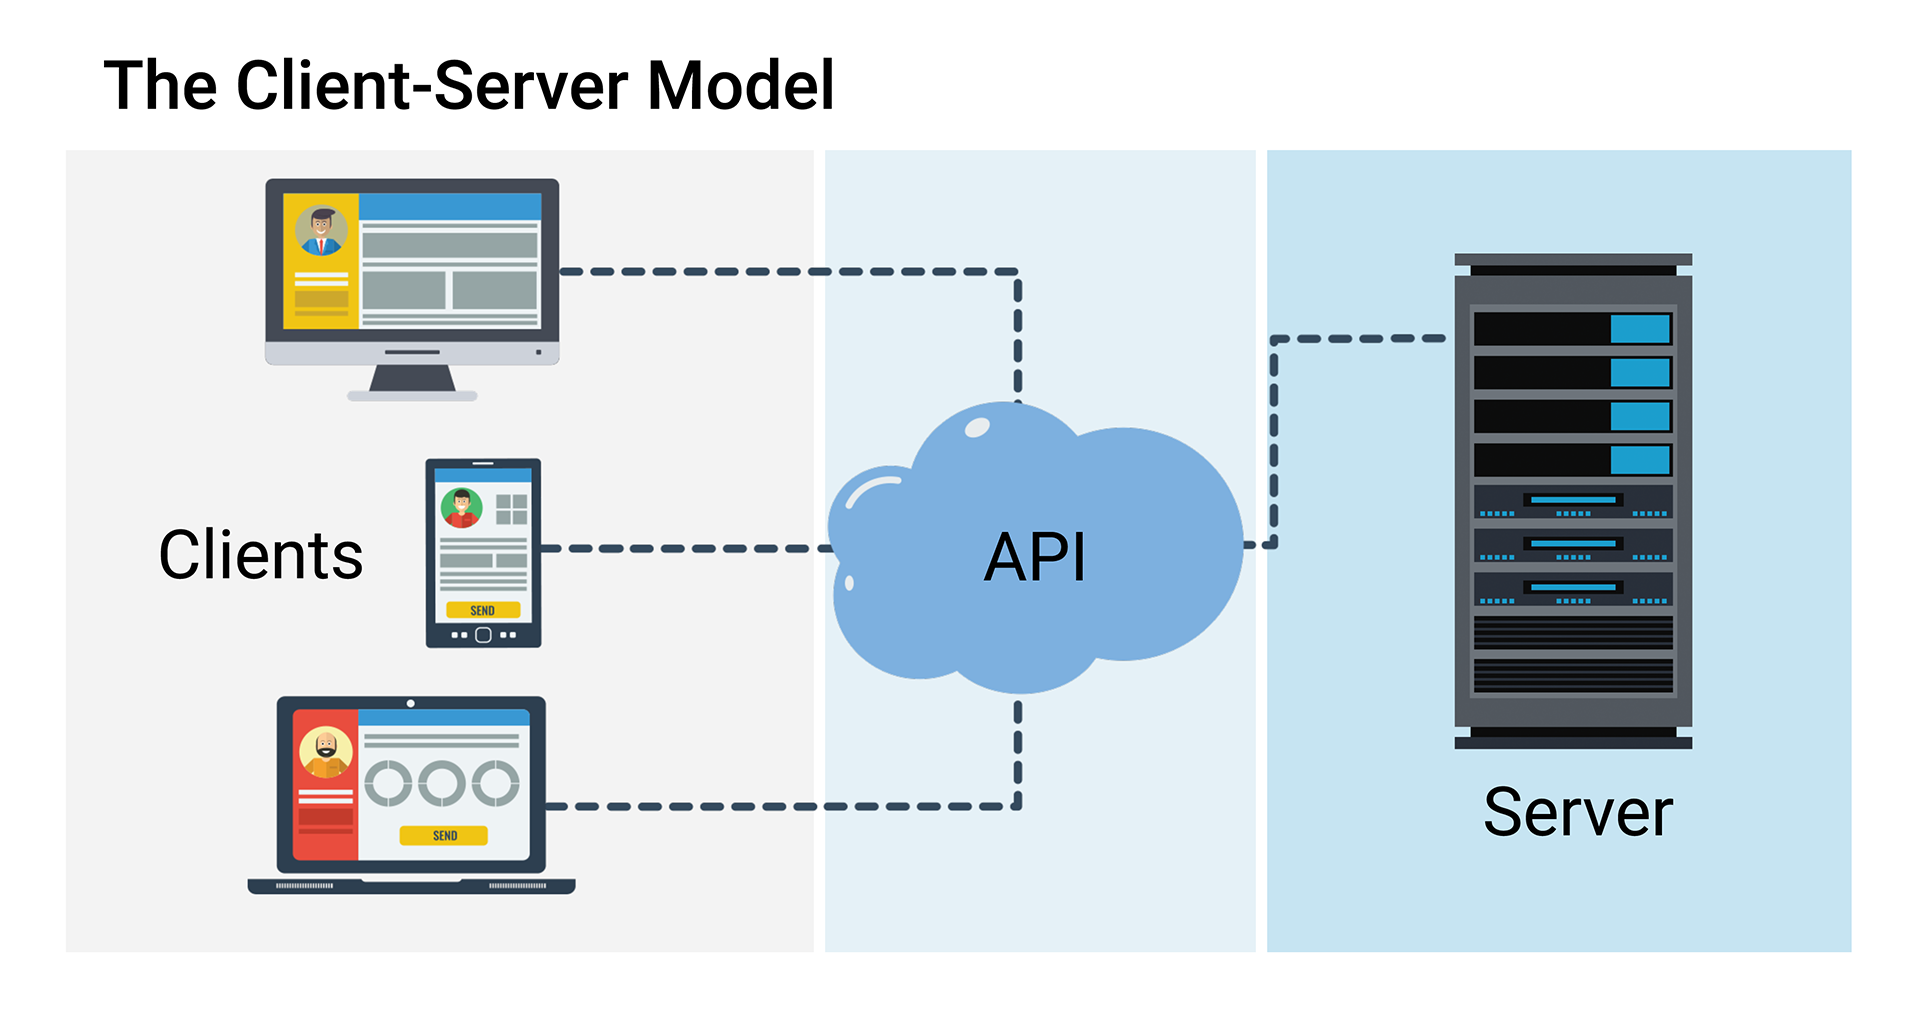


The computer that makes the API request, which is also known as the `API call`, is the client. The one that answers the API request with the response data is the server. The API is the software that facilitates the communication between the client and the server.

# APIs in Fintech.

We can use APIs to extract data from financial service providers (like Quandl and Alpaca), connect applications to platforms (like Amazon Web Services or Microsoft Azure), and to manage personal finances by using services (like Plaid). With APIs, we can gather data, create DataFrames, and program dynamic visualizations.

Best of all, APIs give developers on-demand access to the most current data that’s available. Because developers build the API calls right into an application, they can automate the calls to request the most recent data that’s available from the provider—every time the application loads. Incorporating real-time data into an application’s analysis makes it more accurate and robust.

## ON THE JOB.

In the fintech world, APIs provide access to a wide range of data. For example, say that you’ve been tasked with building a database of historical, high-frequency pricing information about NASDAQ stocks. Using an API from NASDAQ or another financial-data provider will simplify and expedite the process of gathering all the data that you need for your database.

APIs are everywhere and can do almost anything! All that stands between you and the power of APIs is knowing how to make an API call—and taking the following short assessment about the client-server model:

Now, we can make our first API call.

# Making API Calls with the Requests Library.

When working with APIs, we’ll again work in Jupyter Notebook. One of the most straightforward ways to make an API call is by using the Python Requests library (Links to an external site.). We also need the `JSON library` to work with files in the `JavaScript Object Notation (JSON) format`, which is currently the standard for API responses.

Anaconda comes with both the `Requests` and `JSON libraries`, so you don’t need to install anything. However, you do need to import these libraries into your Jupyter notebook file, as the following code shows:

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import requests
import json

Now that we’ve imported the required libraries, we can make an API request.

# Make an API Request.

Make an API Request.

In [ ]:
# Make the API request
response = requests.get("endpoint").json()

# Display the response data
print(json.dumps(response, indent=4, sort_keys=True))

Reviewing this code, notice the first function: `requests.get`. The `requests` library has a series of related functions that act as instructions to the API. The get function lets the API know that the client wants to get information from the server.

### Extra Knowledge [ Deep Dive ].

The get function refers to one of the `HTTP methods`. The Python Requests library supports the `GET`, `POST`, `PUT` and `DELETE` request types. Each request type serves a different purpose:

- The `GET` request extracts and acquires data from a server.

- The `POST` request pushes new or updated data to the server.

- The `PUT` request overwrites content on the server.

- The `DELETE` request removes content from a server.


We’ll focus on `GET` requests, because our analysis will require us to extract and acquire data from a server.

Next, notice the "endpoint" that the requests.get function includes. An endpoint is the URL, or web address, that maps to the data server. It’s the key to making a successful API call. The endpoint points to the specific location on the server that the client uses to access the data that the API request details. For example, when you make a request to the https://amazon.com/ endpoint, the Amazon web server sends you a response that consists of the Amazon homepage and possibly your account information.

Finally, the `print` function—which is the last line in the preceding code—references the `json.dumps` function with the following three parameters:

`response`: This refers to the `response` variable that the code is set to—the result of the API call—by using the `requests.get function` . This variable contains the `response` data that the server sent back. The response data from an API call comes in a series of `key-value` pairs, just like a Python dictionary.

`indent = 4`: This controls the number of spaces to indent each nested level of the response data. (You’ll find out what we mean by nesting when we review the API response.)

`sort_keys` = True: This tells the application to render the keys that the response data specifies in a sorted order. The sort order is alphabetical within each level of nesting.

Overall, the json.dumps function formats the response data to make it readable for humans.

Now, let’s apply all of this to an example.


# Make a Request to the Free Crypto API.

Say that we want to get the price of Ripple cryptocurrency (symbol: XRP) from the Free Crypto API (Links to an external site.). The following code shows the API request:

https://alternative.me/crypto/api/

In [6]:
# Set the Ripple endpoint
xrp_url = "https://api.alternative.me/v2/ticker/Ripple/"

# Fetch the current Ripple price
response = requests.get(xrp_url).json()

# Display response data
print(json.dumps(response, indent=4, sort_keys=True))

{
    "data": {
        "52": {
            "circulating_supply": 46946349017,
            "id": 52,
            "last_updated": 1634777087,
            "max_supply": 100000000000,
            "name": "XRP",
            "quotes": {
                "USD": {
                    "market_cap": 53622196948,
                    "percent_change_1h": 1.51453092759613,
                    "percent_change_24h": 6.26594903400175,
                    "percent_change_7d": 2.78669356499491,
                    "percentage_change_1h": 1.51453092759613,
                    "percentage_change_24h": 6.26594903400175,
                    "percentage_change_7d": 2.78669356499491,
                    "price": 1.16,
                    "volume_24h": 4291345912
                }
            },
            "rank": 6,
            "symbol": "XRP",
            "total_supply": 46946349017,
            "website_slug": "ripple"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

Let’s break down what’s happening in this code:

1 - We reference the endpoint URL and specify that we’re seeking information about Ripple.

2 - We set the endpoint URL equal to the `xrp_url` variable that we call inside the requests.get function.

3 - The `json.dumps` function and its parameters create an API response to display a readable, indented JSON file. (The parameters are the response variable, indent=4, and sort_keys=True.)

If you run this code in your notebook, you’ll get a different result. This is because an API call gets the most recent data that’s available. You’ll get a different Ripple price than the one in the preceding code block and screenshot, because you called the Free Crypto API at a different time.

Our request successfully generated a response! But what is it, and what do we do with it?

# Parse the JSON Response.


The data returned from an API call is a JSON response object. JSON is an open standard file format that converts response jargon (which reads like gibberish) into a human-readable object. We can more easily parse this object, or break it down into its parts.

## Extra Knowledge
JSON is an open standard file format. The standards organization overseeing JSON data defines this format, which people use to store digital data. The term open refers to the fact that anyone can use and implement this format. The JSON format uses human-readable text to store and transmit data objects that consist of key-value pairs. For more information about JSON data, refer to JSON.org (Links to an external site.).

https://www.json.org/json-en.html


# Back on track.

If you closely examine the response object in the code block and screenshot in the previous section, you’ll notice that it resembles a Python dictionary—one of your old friends! The object stores the data as a series of key-value pairs. In the response from the Free Crypto API, the top-level key is "data". The value that’s associated with the "data" key is another, nested, dictionary, which consists of another key-value pair. In this case, the key, which is a second-level key, is "52". The value that’s associated with the "52" key is yet another nested dictionary, which consists of an array of key-value pairs. One of the pairs is "symbol": "XRP".

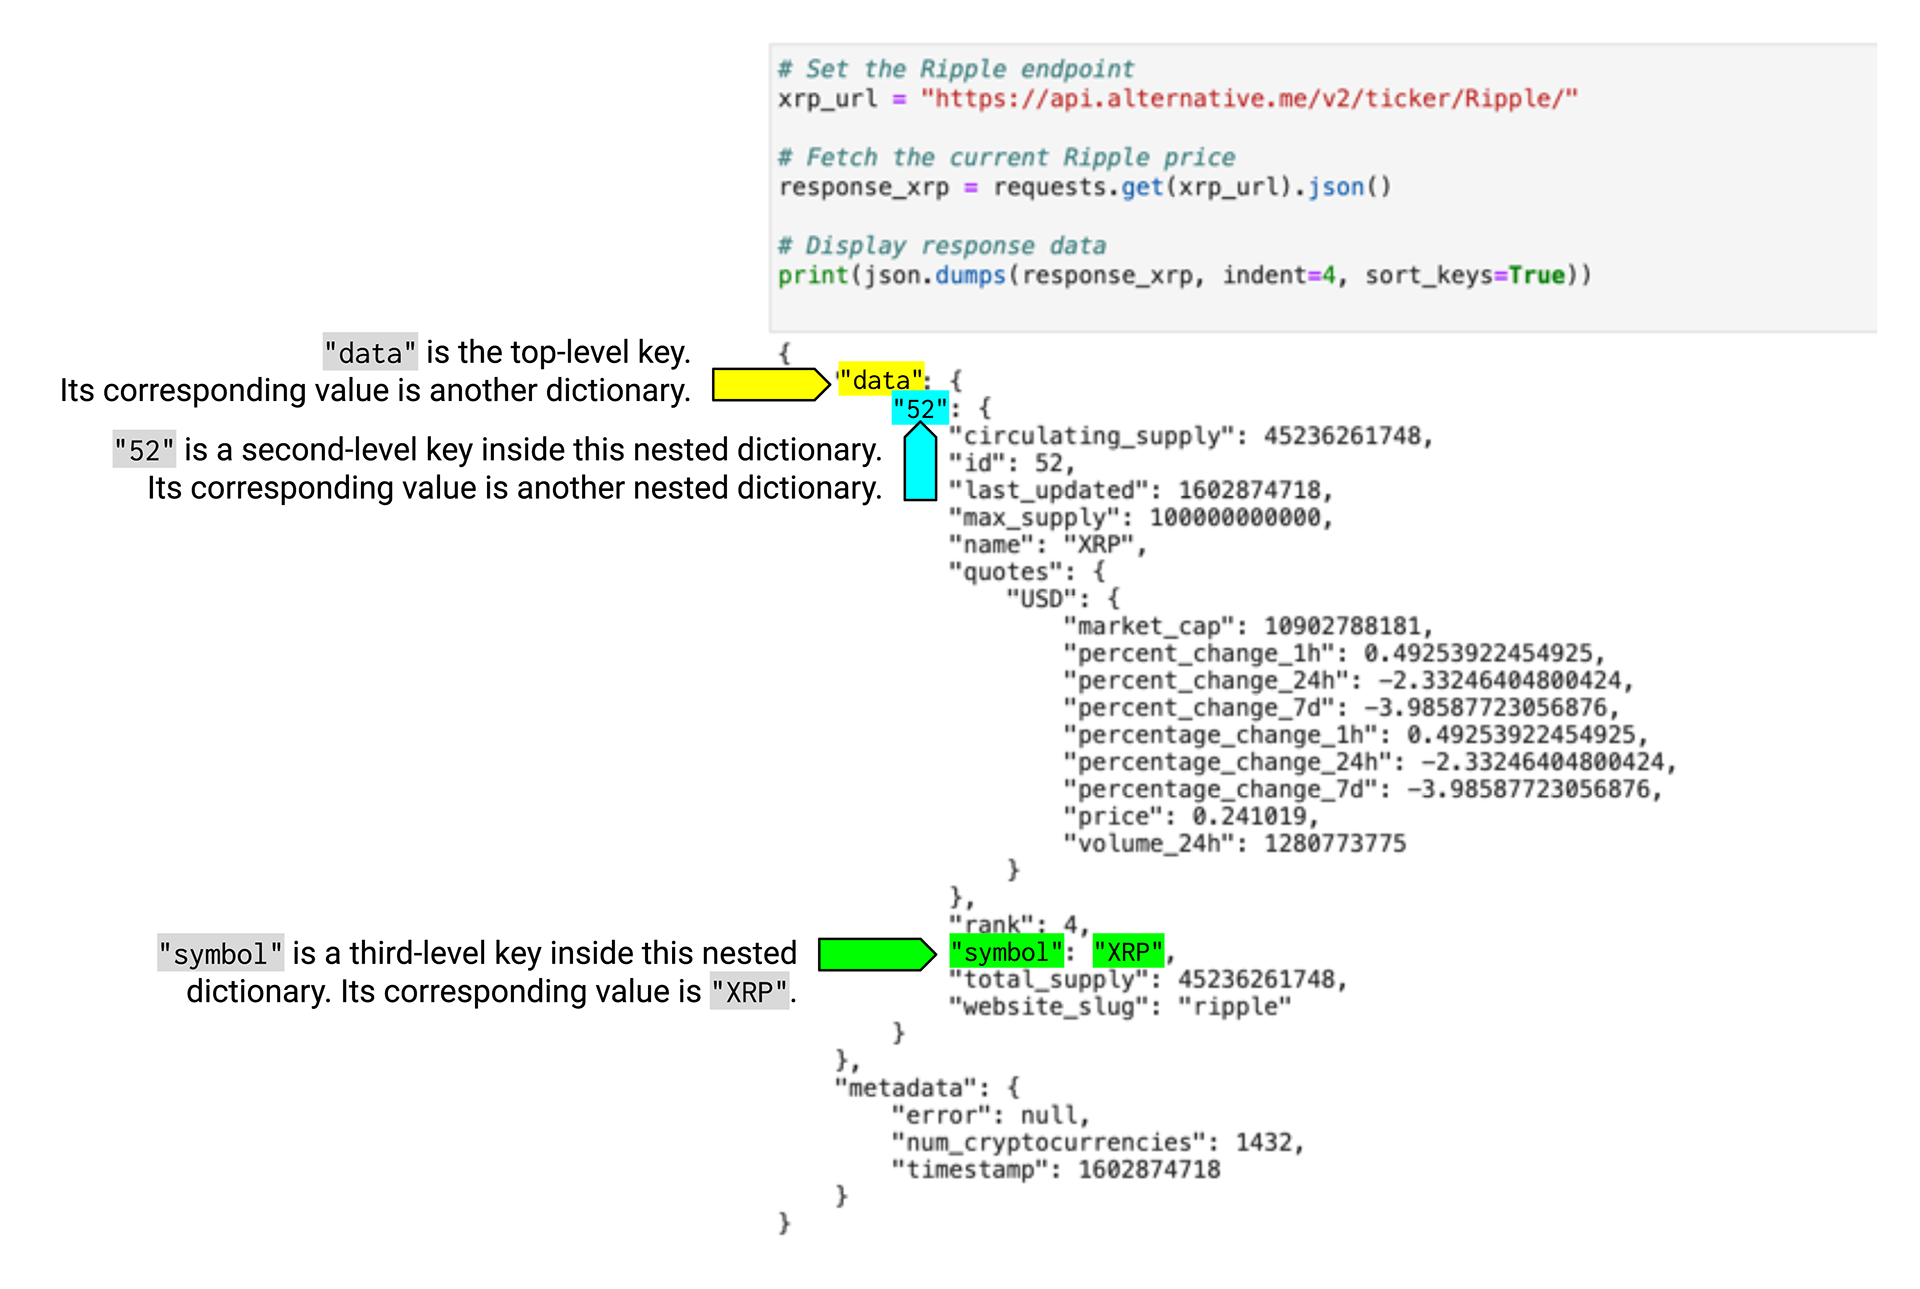

When you navigate to your chosen key, you can access its value.

## Do you remember ?

A Python dictionary is a data container that’s defined a series of key-value pairs inside a set of braces ({ }). We generally code the keys as strings or numbers, but for the values, we can use any data type—including Python lists and dictionaries. When the value that’s associated with a dictionary key is another dictionary, we refer to it as a nested dictionary (Links to an external site.). As the preceding image shows, a JSON response object mostly consists of a series of nested dictionaries—that is, a dictionary inside a dictionary inside a dictionary.

For example, let’s get the values for the `symbol` and `price` keys. For this, we use bracket notation. To navigate through the levels of nesting, we reference the key at each level in a set of brackets ([ ]), as the following code shows:

In [5]:
# Set the Ripple endpoint
xrp_url = "https://api.alternative.me/v2/ticker/Ripple/"

# Fetch the current Ripple price
response = requests.get(xrp_url).json()

# Display response data
print(json.dumps(response, indent=4, sort_keys=True))

{
    "data": {
        "52": {
            "circulating_supply": 46878114887,
            "id": 52,
            "last_updated": 1634683727,
            "max_supply": 100000000000,
            "name": "XRP",
            "quotes": {
                "USD": {
                    "market_cap": 50889412293,
                    "percent_change_1h": -0.113211757085548,
                    "percent_change_24h": 0.500037408713734,
                    "percent_change_7d": -4.10403045852818,
                    "percentage_change_1h": -0.113211757085548,
                    "percentage_change_24h": 0.500037408713734,
                    "percentage_change_7d": -4.10403045852818,
                    "price": 1.09,
                    "volume_24h": 3550736080
                }
            },
            "rank": 6,
            "symbol": "XRP",
            "total_supply": 46878114887,
            "website_slug": "ripple"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocur

In [7]:
xrp_symbol = response['data']['52']['symbol']
print(f"The symbol for Ripple is {xrp_symbol}")


The symbol for Ripple is XRP


In [9]:
xrp_price = response['data']['52']['quotes']['USD']['price']
print(f"The price for Ripple is ${xrp_price}")

The price for Ripple is $1.09


Reviewing the original response object again, we can trace the levels of nesting to get the value associated with the "symbol" key. The "data" key represents the first level of nesting, the "52" key represents the second level, the "symbol" key represents the third level, and "price" key represents the fourth level.

The following image shows the response object again and points out the levels of nesting:

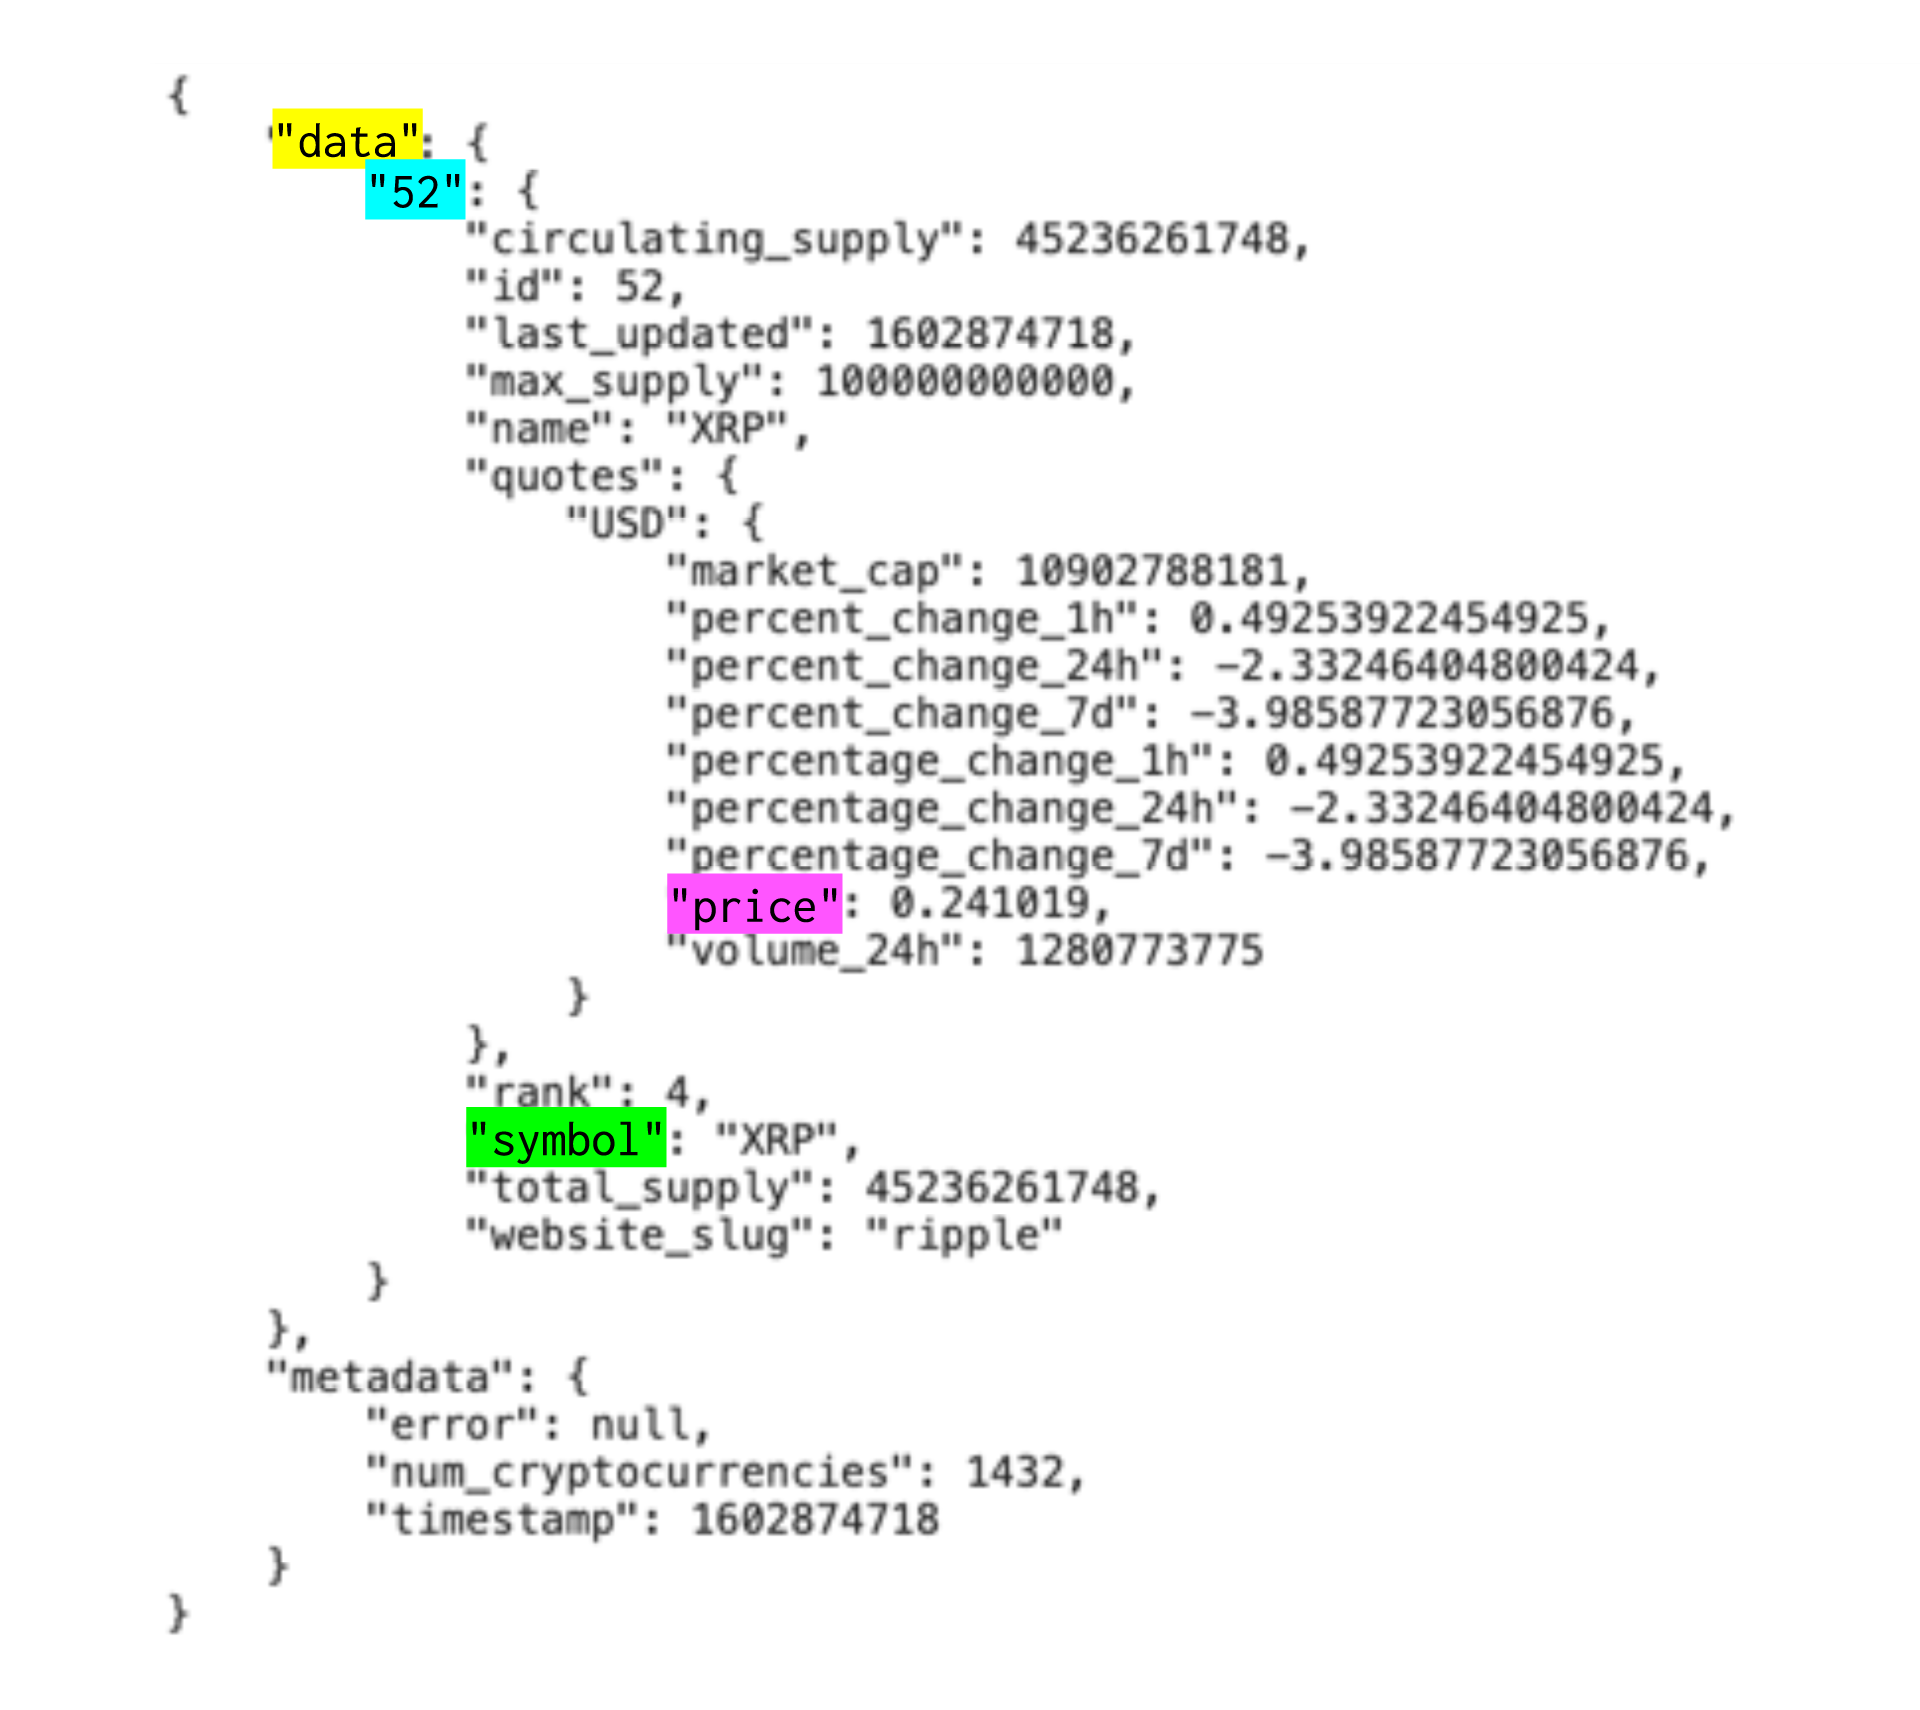

Getting pieces of data from a JSON object usually involves some trial and error. It might take one or two tries before you successfully detail each level and arrive at the piece of data that you need.

# CHALLENGE CONNECTION

In this week's Challenge, you’ll navigate the JSON response object from calls that you make to the Free Crypto API. You’ll do this to capture the prices that you need for your portfolio valuation.

From running just a few lines of code, new data appears in your notebook. But, before you start imagining all the possibilities that this new skill makes available to you, try to make an API call on your own.

# Mini- Tutorial

Use the following code snippet to make an API call to the Free Crypto API (Links to an external site.). Make this call to retrieve the current pricing information for the Litecoin (LTC) cryptocurrency. Get the value that’s associated with the "rank" key by using bracket notation. Here’s the code snippet:

In [8]:
# Import the required libraries and dependencies
import pandas as pd
import requests
import json

# Set the  endpoint
ltc_url = "https://api.alternative.me/v2/ticker/Litecoin/"

# Fetch the current Ripple price
ltc_response = requests.get(ltc_url).json()

# Display response data
print(json.dumps(ltc_response, indent=4, sort_keys=True))

{
    "data": {
        "2": {
            "circulating_supply": 68793808,
            "id": 2,
            "last_updated": 1634777959,
            "max_supply": 84000000,
            "name": "Litecoin",
            "quotes": {
                "USD": {
                    "market_cap": 14518632108,
                    "percent_change_1h": 1.65849743140578,
                    "percent_change_24h": 12.4740169243152,
                    "percent_change_7d": 18.7262340618091,
                    "percentage_change_1h": 1.65849743140578,
                    "percentage_change_24h": 12.4740169243152,
                    "percentage_change_7d": 18.7262340618091,
                    "price": 211.11,
                    "volume_24h": 2995628698
                }
            },
            "rank": 15,
            "symbol": "LTC",
            "total_supply": 68793808,
            "website_slug": "litecoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies": 

# Solution

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
import requests
import json

# Set the Ripple endpoint
ltc_url = "https://api.alternative.me/v2/ticker/Litecoin/"

# Fetch the current Ripple price
ltc_response = requests.get(ltc_url).json()

# Display response data
print(json.dumps(ltc_response, indent=4, sort_keys=True))

Nice work! You can now make an API call, parse a JSON response object, and get an element from inside that response object. The world of data via APIs is within your reach—almost!

Unfortunately, not all API data is publicly open and accessible to anyone with a computer and some Python knowledge. That would be like having the front door of your home wide open for anyone to come in and take whatever they want from your refrigerator.

Just like your front door requires a key for entry, most APIs require authentication for getting the data that they make available. In the next section, we’ll explore authenticated APIs, how they work, and how to collect data from them.

# Using Authenticated APIs

APIs make an incredible amount of data available, and they make a good amount of that publicly available. As we discovered with the Free Crypto API, we can easily get cryptocurrency pricing information. Government organizations at all levels also tend to make their information freely accessible.

Most companies and data providers, however, share information only with particular people or trustworthy parties. Because an API request interacts with a company data server, it leaves the company vulnerable to data corruption, fraud, and abuse. To mitigate these issues, API providers secure their endpoints by providing access only to parties that they trust.

# ON THE JOB

The data that an authenticated API supplies tends to be of higher quality than that from a publicly accessible API. For example, publicly accessible APIs tend to supply stock pricing data on an industry-standard 20-minute delay. Authenticated APIs might supply pricing data on only a 5-minute delay—or even in real time, if the API requires payment.

Higher-quality data seems pretty enticing, right? Let’s find out how authenticated APIs work and how we can access their data by using Python.

# Lecture 22

# Secure Your API Calls with API Keys.

To access an authenticated API, a user must sign up for an `API key`. An `API key` is a token that serves as a credential (like a username or password). This token grants the user the privileges and permissions that they need to submit API requests to the company that issued the API key.



Companies use API keys to monitor and control user requests and to receive compensation for their services and intellectual property. Because API keys detail the privileges and permissions for users, companies can programmatically disable and enable the API privileges. APIs that require keys will reject any request that doesn’t include an API key. Some companies, like Quandl and Alpaca, allow you to create an API key free of charge to access some data and services. However, you need to pay a fee to access the premium functions, like real-time asset pricing or volume data.

# Story time.

Because API keys are unique identifiers—they identify the user submitting the API request—it’s important for users to protect their API keys. Do NOT make API keys available in public repositories (such as GitHub).

The most professional method of protecting sensitive information like API keys is to use environment variables.

# Work with Environment Variables.

An environment variable is a variable with associated values that you can use only inside a specific project or environment that exists on your local computer. The values of these variables include sensitive information, like API keys.

For example, the following codes shows an environment variable:

In [1]:
TEST_API_KEY = "aaBB3dEfgH1jKlmN0P"

The professional standard for incorporating environment variables into a program is to create an environment file `(.env)` in your project. This file holds the environment variables that you want to use for your local project.

When you include a .gitignore file in your GitHub repo (as you’ve been doing), you also protect the environment variables. The .gitignore file prevents the environment file from being uploaded to your public repository.

If your `.gitignore` file doesn't have `.env` listed inside, you need to add that line so that GitHub will exclude the environment file.

To summarize, the environment file (.env), which contains the API key information, is available on your local computer for use in your project. The .gitignore file ignores the environment file, preventing it from being uploaded to the GitHub repo and exposing sensitive information. This process keeps your API keys under lock and key.

The following video takes you through the process of setting up an environment file for a local project. The video uses an API key from `Quandl`, which supplies financial and economic datasets, to illustrate the example.

If you haven’t already done so, sign up for a Quandl API key (Links to an external site.). The Getting Started page in the Introduction to this module has the step-by-step instructions for this process. Once you have your API key, copy it to someplace that’s accessible, like a password keeper or a document on your computer.

In [ ]:
# Show in notebook

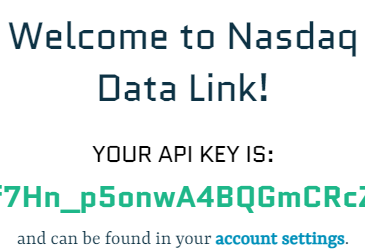

In [ ]:
my_key = "NOKEYf7Hn_p5onwA4BQGmCRcZ"

In this week’s Challenge, you’ll use an environment file (to keep your API keys private) along with a .gitignore file (to keep your API keys from being exposed in your public repository).

# Please install the following.

In [2]:
pip install python-dotenv

# gitignore

https://www.freecodecamp.org/news/gitignore-what-is-it-and-how-to-add-to-repo/

Now, it’s your turn. In the following activity, you’ll create an environment file and make a Quandl API key accessible in a local project.

# Activity: Set Up a Quandl API Key.

In this activity you’ll make your own Quandl API key available in a Jupyter notebook with an environment file `(.env)`

## Background.

The ability to store and access your API keys from an environment file is essential to your success in this module and beyond. Almost all the APIs that you’ll use in this course require an API key. API keys should not be uploaded to a public GitHub repository that features your code. Your task in this activity is to store an API key in an environment file and then access it in a Jupyter notebook.

## Files.
Download the following files to help you get started:

Set Up a Quandl API Key files: https://courses.bootcampspot.com/courses/800/pages/5-dot-1-5-activity-set-up-a-quandl-api-key?module_item_id=235148


Lets solve: https://courses.bootcampspot.com/courses/800/pages/5-dot-1-5-activity-set-up-a-quandl-api-key?module_item_id=235148

# Making Authenticated API Calls with Quandl.

Quandl (Links to an external site.) supplies financial and economic datasets to both hobbyist and professional investors. Quandl thus has a vested interest in knowing who’s making requests to its data servers. Therefore, to access those servers and the response data, you must use an API key.

# Make an API Call to Quandl

To make an API Call to Quandl, the first step is to set up an environment file (.env) in the project folder. Your environment folder should contain any API keys that you need to make the call. In this case, you need `QUANDL_API_KEY’`. (This step should mirror the one that you just did in the previous activity.)

With the environment file established, we’ll turn our attention to the Jupyter notebook that we’ll use to make the API call.

First, we import all the required libraries and dependencies. These include the ones for accessing the API key from the environment file (os and dotenv), for making the API call to Quandl (requests), and for working with the response data (pandas and json). The following code shows the exact syntax for all these imports:



In [3]:
# Import the required libraries and dependencies
import pandas as pd
import os
from dotenv import load_dotenv
import requests
import json

# Load .env environment variables
load_dotenv()

True

The code to make the Quandl API call has some of the same components as the Free Crypto API call. However, some additional syntax exists.

For example, the endpoint URL for the Quandl API request has parameters at the end that help the server respond to the API call. One of these parameters is a reference to api_key, which we must add, or concatenate, to the end of the URL that the request includes.

Here’s the code snippet in full:

In [ ]:
# Retrieve the API key from the environment variable and store as Python variable
quandl_api_key = os.getenv("QUANDL_API_KEY")
type(quandl_api_key)

# Define the base request URL for Quandl
# Note the `limit=10` and api_key=` parameters.
request_url = "https://www.quandl.com/api/v3/datasets/WIKI/MSFT.json?limit=10&api_key="

# Concatenate request_url and quandl_api_key and store as a new variable
quandl_request_url = request_url + quandl_api_key

# Execute the API call to Quandl using requests.get
response = requests.get(quandl_request_url).json()

# Display response data using json.dumps
print(json.dumps(response, indent=4, sort_keys=True))

Let’s break down the request_url. Here it is again in its entirety:

In [4]:
request_url = "https://www.quandl.com/api/v3/datasets/WIKI/MSFT.json?limit=10&api_key="

You can think of the request URL in terms of the two main types of API endpoint parameters: path parameters and query parameters.

Path parameters live within the endpoint URL. For example, in the following URL, WIKI and MSFT.json are path parameters that indicate the dataset being accessed and the ticker of interest:

Query parameters are parameter-value combinations that appear in the URL after a question mark (?). You can pass more than one parameter by using an ampersand (&). For example, in the following URL, limit and api_key are the query parameters, and 10 and ************ are the values. (Remember that API keys are secret!)

?limit=10&api_key=”

The query parameters help determine which information comes back in the response object. In this case, the limit parameter limits the MSFT pricing information to 10 entries. If we removed this query parameter, you might end up scrolling through the response object for a while!

And speaking of response objects, next let’s analyze the API response.

# Parse the Quandl API Response.

Before we break down the output from our API call, let’s display it at a high level. The following screenshot shows a truncated portion of the output:

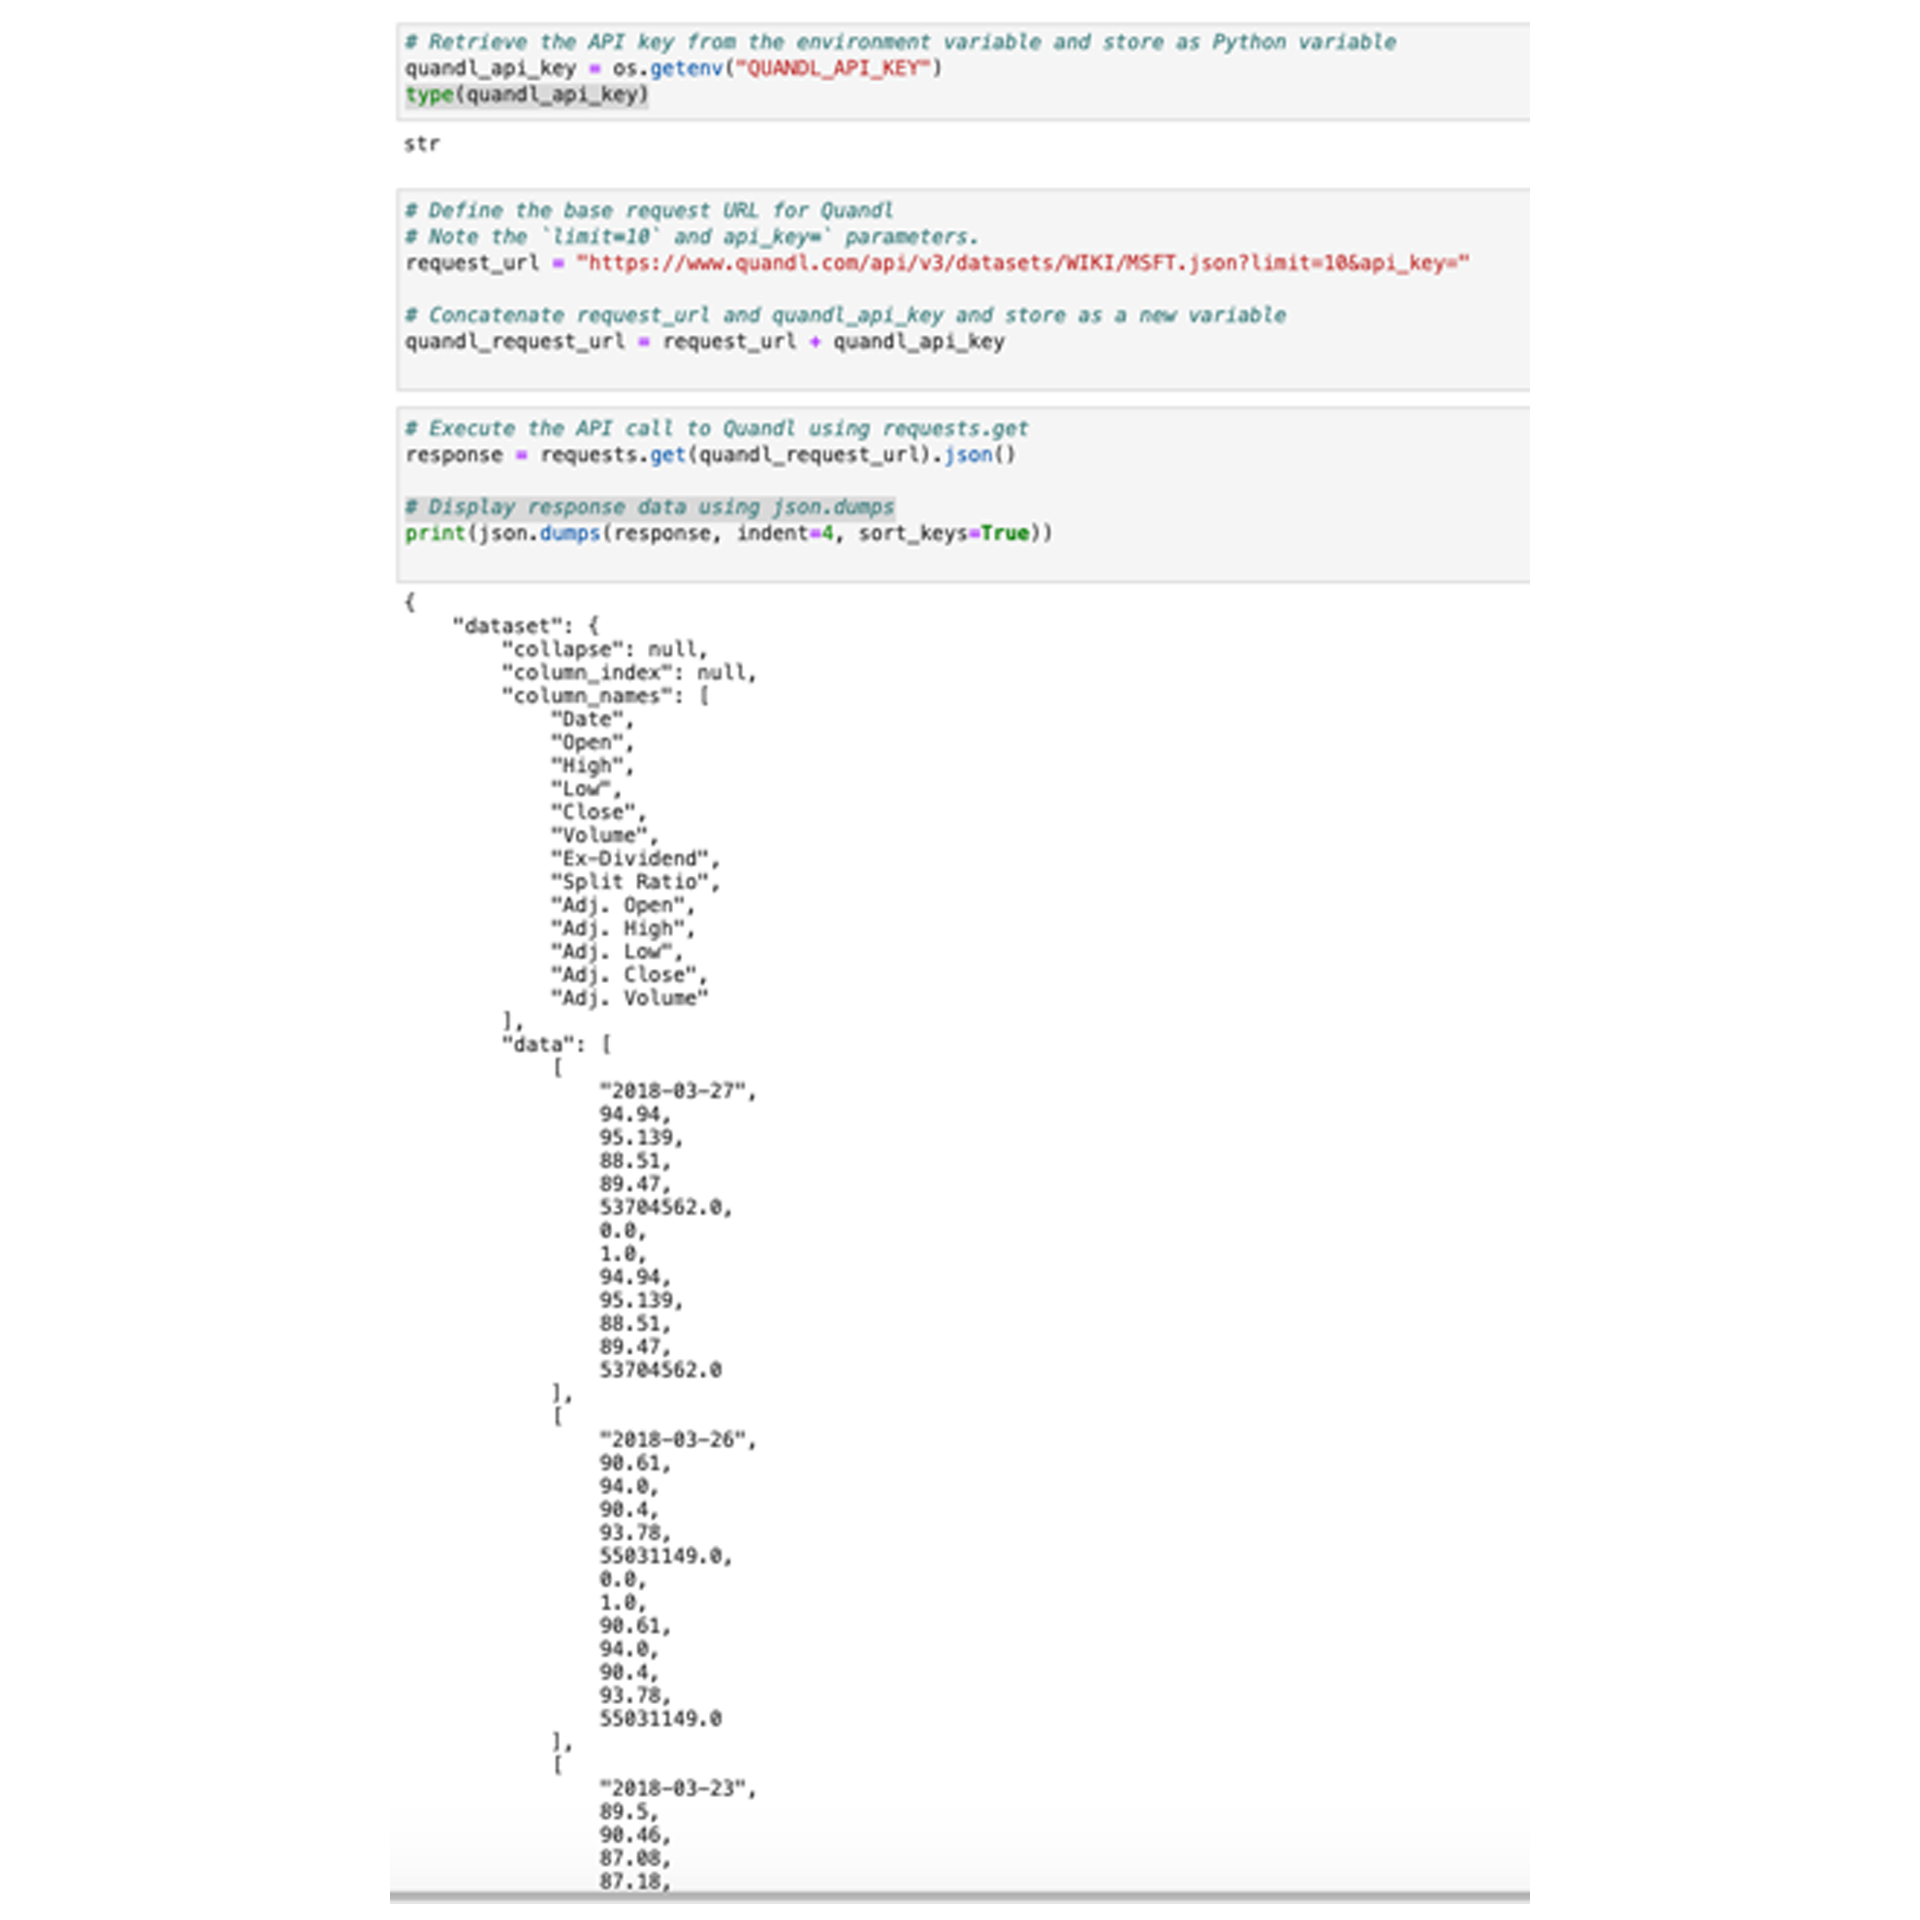

The JSON response object from the Quandl API call contains the following:

A top-level key named "dataset", which has a nested dictionary for its value.

A second-level key named "column_names". This key has a list for its value that contains the name of the columns: "Date", "Open", "High", and so on. We know that it’s a list because of the brackets ([ ]).

A second-level key named "data". The value consists of a list of lists of pricing data for each of 10 days. We know that these are lists because of the brackets ([ ]), and our limit was 10. The information in the list for each day matches the order that the "column_names" list supplied to us.

To access the value of a dictionary element, we use bracket notation and reference the key. To access a list element, we use bracket notation but reference the index position, which starts at zero.

To access the "Open" value of 94.94 from the "data" that’s associated with the date of 2018-03-27 (as the preceding image shows), we navigate our way through the response object. We do this by using bracket notation and referencing the keys that are associated with the dictionaries and the index positions of the elements that the lists include. The following code shows how we do this:

In [ ]:
open_2018_03_27 = response["dataset"]["data"][0][1]

The output confirms that we successfully navigated the response object, as the following image shows:

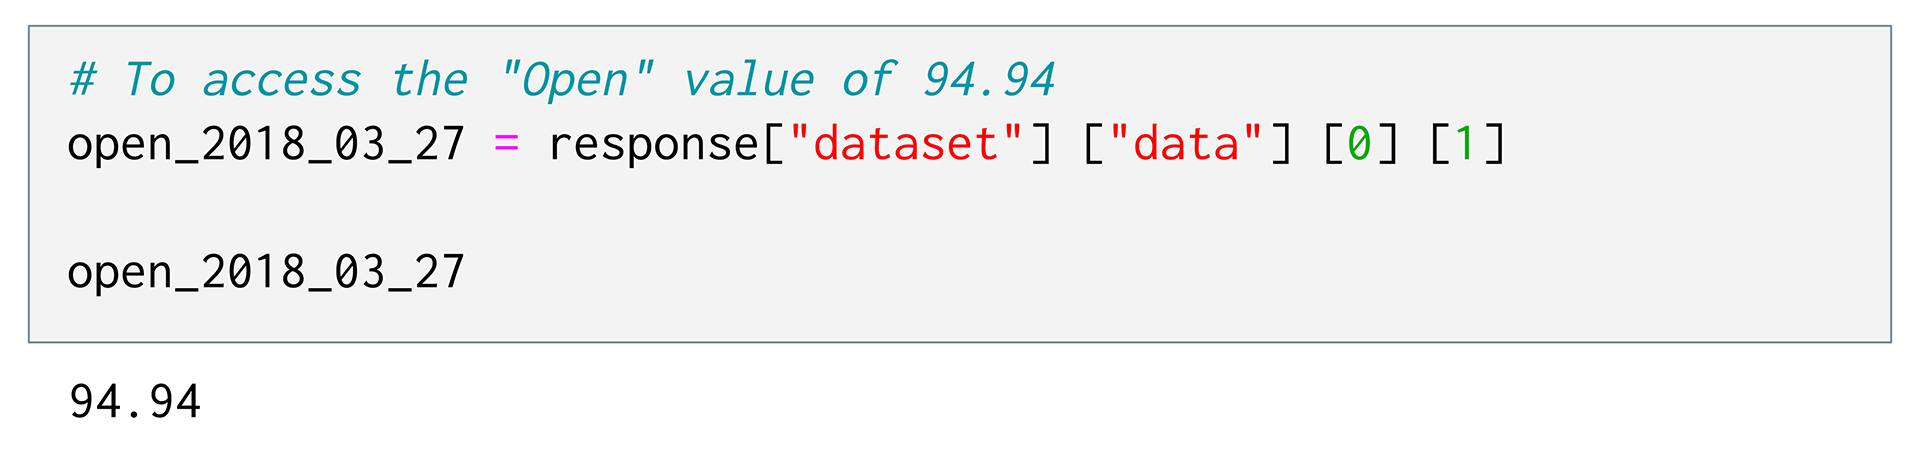

In the following activity, you’ll have the opportunity to explore the Quandl API.

# Activity: Set Up a Quandl API Key.

## Activity_1

https://courses.bootcampspot.com/courses/800/pages/5-dot-1-5-activity-set-up-a-quandl-api-key?module_item_id=235148

# Activity: Big Mac Index.

# Activity_2

https://courses.bootcampspot.com/courses/800/pages/5-dot-1-7-activity-big-mac-index?module_item_id=235155

# Moving from the Requests Library to SDKs.

Innovative financial APIs are disrupting the finance and fintech industries by democratizing and decentralizing financial data stores and analytic approaches. Companies regularly release new APIs and SDKs, which means that the fintech world is constantly advancing and evolving. It’s a new world, and one to be excited about!

In this section, you’ll take the next step in using APIs. Instead of using the Python Requests library, you’ll use SDKs. These offer more security for companies and a more-structured data collection experience for the user.

## Retrieve Data with SDK Functions.

An SDK is a collection of software tools that come in a single installable package. Companies develop SDKs to ease accessing their data via API calls. SDKs require us to use specific syntax when making API calls. This syntax, which includes company-specific functions, streamlines the ability of the server to respond to the API calls.

SDKs often require a level of user authentication that surpasses the level for more-generic API calls. This is because the data that SDKs supply tends to have better quality—it’s often cleaner and more current.

Although we use different syntax to make an API request via an SDK, we follow the same process that we use with the Python Requests library. For example, to get data via the Alpaca SDK, we use the `get function.`

SDKs also offer functions for filtering and calculating data that might prove more efficient than passing parameters in a request URL (like we do in an API call via the Requests library). The following code example shows the difference between using a request URL and using an SDK to access the same information:

In [ ]:
# Example API call using a request URL (using a dummy API key)
requests.get("https://www.quandl.com/api/v3/datasets/WIKI/AAPL?api_key=Qu4nD1K3y")

# Example API call using the Quandl SDK
quandl.get("WIKI/AAPL", rows=5)

The SDK code is cleaner and more straightforward. This is because SDKs offer built-in functions that we can use with the APIs. SDKs also add a layer of security—because they avoid passing sensitive parameters (such as API keys) as plain text in a request URL.

In the fintech industry, you’ll encounter APIs that offer SDKs and others that don’t. That's why you need to understand both how to install and operate an SDK and how to access an API via a request URL by using the Python Requests library.

Now, let’s dive into a company that offers an SDK: Alpaca. Alpaca is a fintech company and trading API that includes banking, security, and compliance functions. Alpaca also allows fintech startups to build brokerage apps by using their underlying software for free.

# Using the Alpaca SDK.

Alpaca is a technology company that’s dedicated to building a stock trading API. Alpaca caters to fintech investment startups but also allows individual investors to access its trading API via a sophisticated SDK.

In addition to its trading capabilities, Alpaca (among others) offers a financial API that you can use free of charge as a fintech professional. You can get current stock-market data from five exchanges: IEX, NYSE National, NYSE Chicago, Nasdaq BX, and Nasdaq PSX. In this section, you’ll learn how to use Alpaca to get stock data that you can use to develop financial applications.

## Set Up the Required Tools.

The Alpaca SDK requires that you authenticate your API calls. Therefore, you need to store your Alpaca API and secret keys in an environment file `(.env)`. In this environment file, name the variables `ALPACA_API_KEY` and `ALPACA_SECRET_KEY`, respectively, and enter your personal authentication information.

If you haven’t already done so, install the Alpaca SDK in your Conda development environment, sign up for Alpaca, and get your Alpaca API and secret keys, and install the Alpaca SDK in your Conda development environment. The Getting Started page in the Introduction to this module has the step-by-step instructions for these processes.

Next, to access the Alpaca SDK, you need to import the alpaca_trade_api library and the libraries that you’ve already been using. The following code shows the full list of required imports:

In [ ]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

After importing the required Python libraries, the next step is to load the variables from the environment file into the Jupyter notebook by using the load_dotenv function. From there, you access the environment variables by using the os.getenv function and set them equal to new variables of the same name. The following code shows these steps:

In [ ]:
# Load .env environment variables
load_dotenv()

In [ ]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

Now, you’re ready to connect to Alpaca!

# Connect to Alpaca.

To use the Alpaca SDK, you need to create an Alpaca API `REST` object. This object contains your API and secret keys and references the API version that you’ll use.

We’ll use the Alpaca-provided `tradeapi.REST` function to create the REST object and pass it the `alpaca_api_key`, `alpaca_secret_key`, and `api_version="v2"` parameters. (The current Alpaca API version is 2.0.)

The code is as follows:

In [ ]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Every time we reference the alpaca variable in an API call, the code will pass alpaca_api_key, alpaca_secret_key, and api_version as part of the request, allowing Alpaca to authenticate the user.

Now, let’s get our data!

# Get Data from Alpaca.

We’ll get the current closing price of Facebook (FB) and Twitter (TWTR) to determine if they’re worth investing in. First, we need to set variables for the start and end dates in the International Organization for Standardization (ISO) format by using the following code:

In [ ]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-06-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-05", tz="America/New_York").isoformat()

##### NOTE.
Countries and regions around the world format their dates differently. For example, the European Union typically uses year-month-day, while the United States typically uses month-day-year. The isoformat function standardizes the dates in a year-month-day pattern.

When the date also includes the time, this function also standardizes it and the corresponding Coordinated Universal Time (UTC) offset for a specified time zone. Note that UTC is also known as Greenwich Mean Time (GMT). For more information about the isoformat function, refer to the Python datetime documentation (Links to an external site.).

With the Alpaca API, we can get stock data from up to 200 ticker names by passing the ticker symbols as a Python list. We’ll create a list of the tech companies that we care about (Facebook and Twitter) with the following code:

In [ ]:
# Set the tickers
tickers = ["FB", "TWTR"]

Next, we need a parameter to define the time frame of the stock data that we want. We’ll create a variable named timeframe to set this parameter as "1D", which stands for one day, with the following code:

# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [ ]:
timeframe = "1D"

We’re all set! Now, to make the API call that gathers the current closing prices for FB and TWTR, we use the `alpaca.get_barset `function.

In [ ]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio

# GOOD NEWSSSSSSSSSSSSS !
Note the df property added to the end of the call to get_barset. When you use this property, the Alpaca SDK automatically converts the JSON response to a Pandas DataFrame.

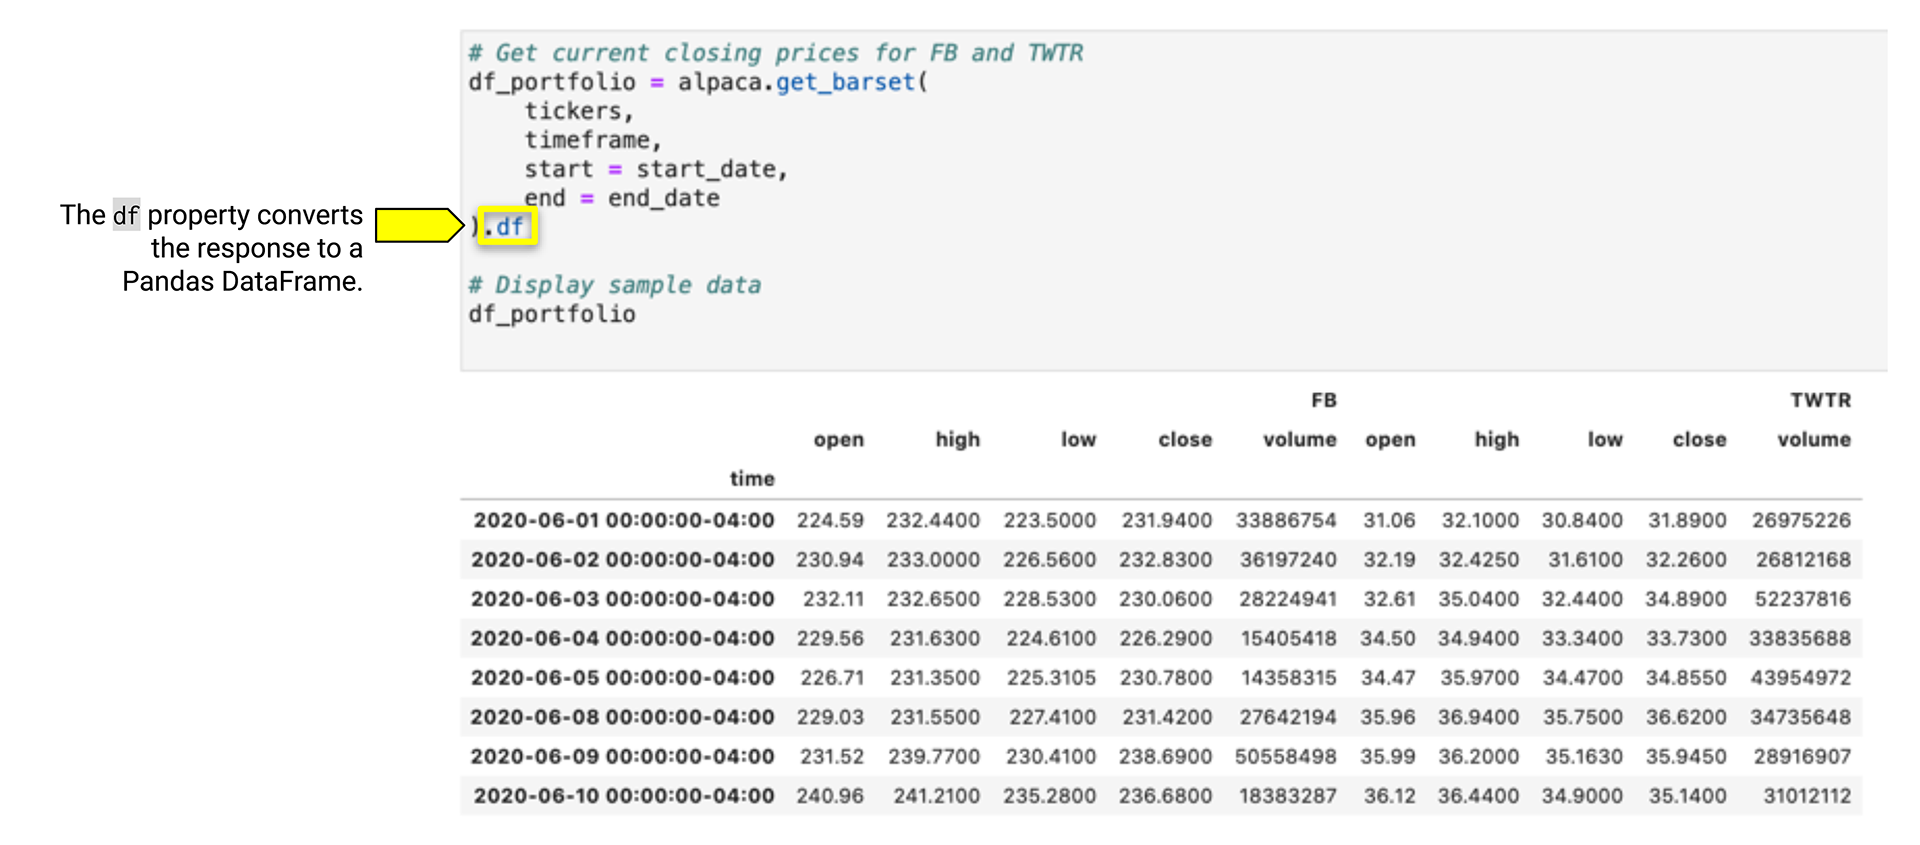

The DataFrame that Alpaca creates has multiple indexes. The preceding image illustrates this. The FB and TWTR ticker symbols (which appear above the column names) represent the top level. The open, high, low, close, and volume categories represent the second level.

The fact that this DataFrame has multiple indexes is important, because that influences the notation that we need to access the data elements. For example, to access the closing price of FB, we need to use the following syntax:

In [ ]:
fb_close = df_portfolio["FB"]["close"]

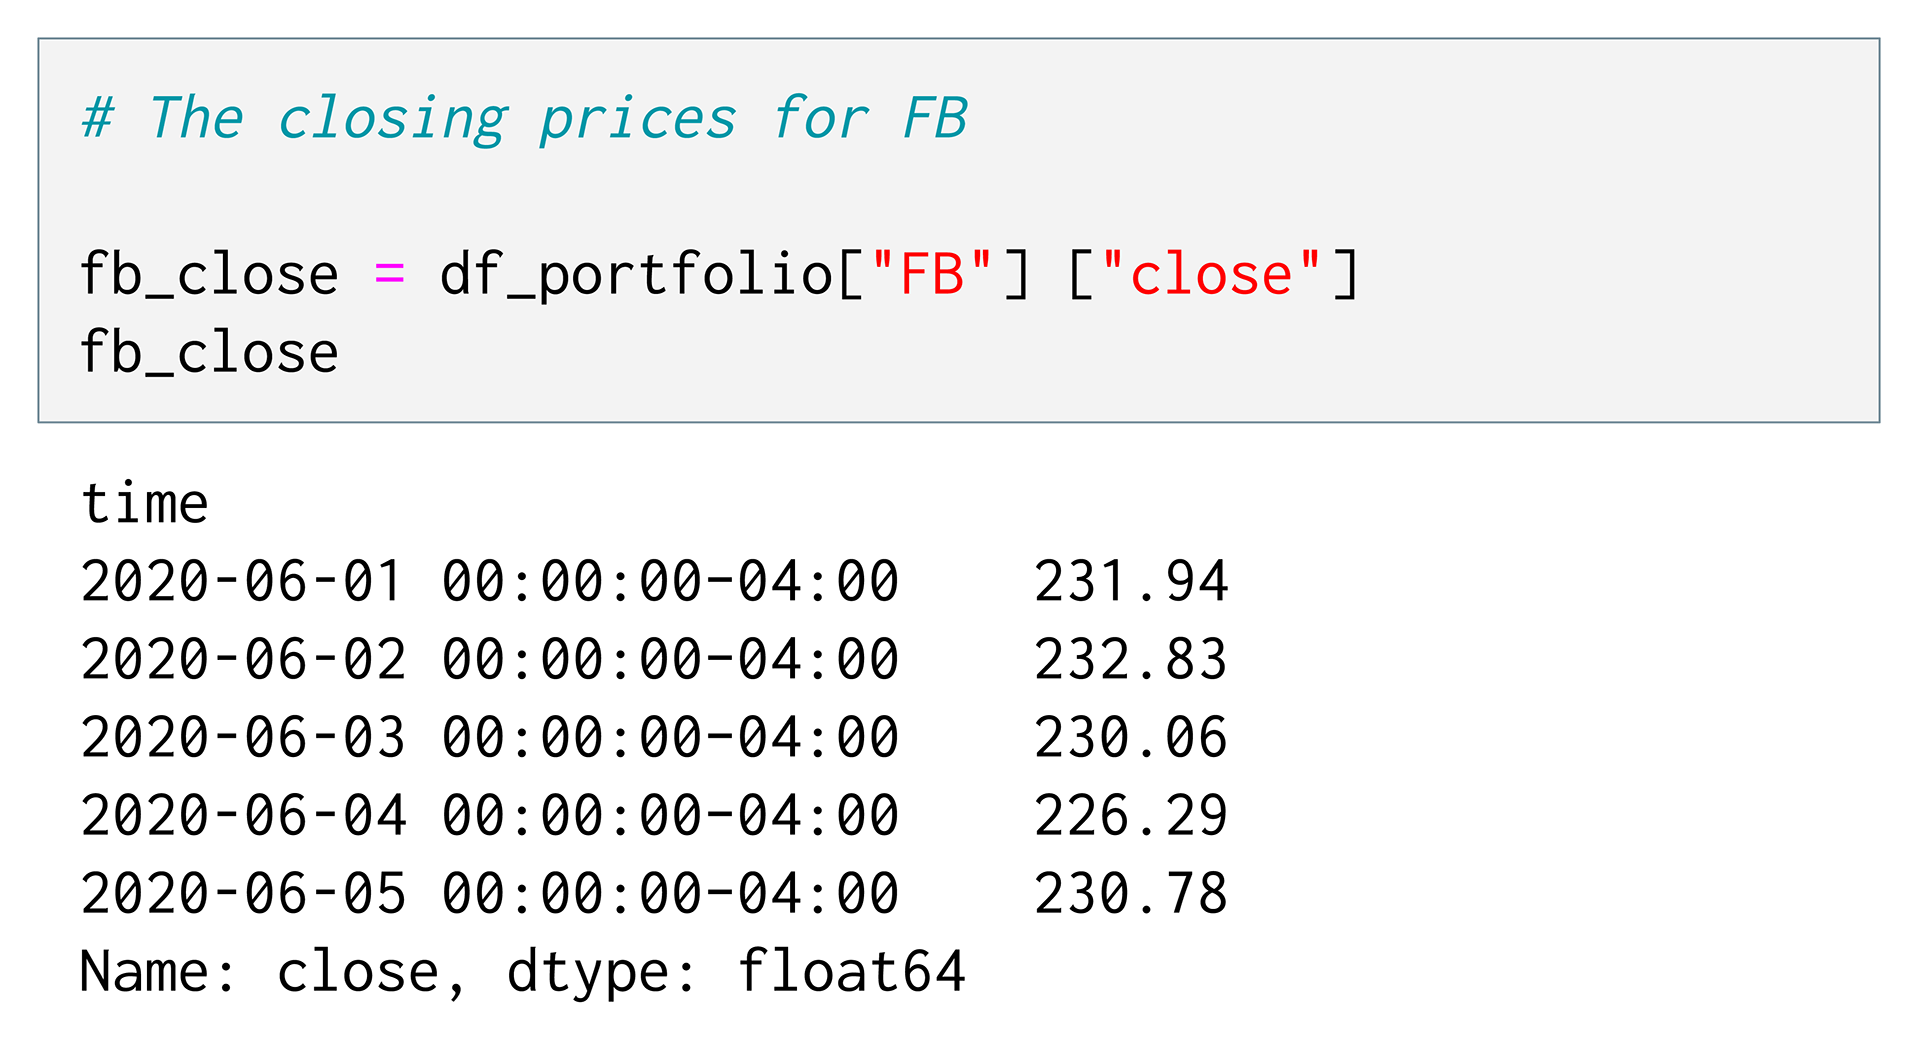

## Question. 
What’s the syntax for accessing the low prices of TWTR?


# Answer

In [ ]:
twtr_close = df_portfolio["TWTR"]["low"]

Nice! Now that we have the closing prices, let’s analyze our data.
# Analyze the Closing Prices

To analyze the closing prices, we’ll create a new DataFrame that contains only the closing prices from Facebook and Twitter over the 30-day day period of June. (We randomly chose this time period for the example.)

The following code creates the closing prices DataFrame, gets the closing prices for Facebook and Twitter, drops the time component from the date, and then displays the data:

In [ ]:
# Create an empty DataFrame for closing prices
closing_prices_df = pd.DataFrame()

# Get the closing prices of FB and TWTR
closing_prices_df["FB"] = df_portfolio["FB"]["close"]
closing_prices_df["TWTR"] = df_portfolio["TWTR"]["close"]

# Drop the time component of the date
closing_prices_df.index = closing_prices_df.index.date

# Display sample data
closing_prices_df.head(10)

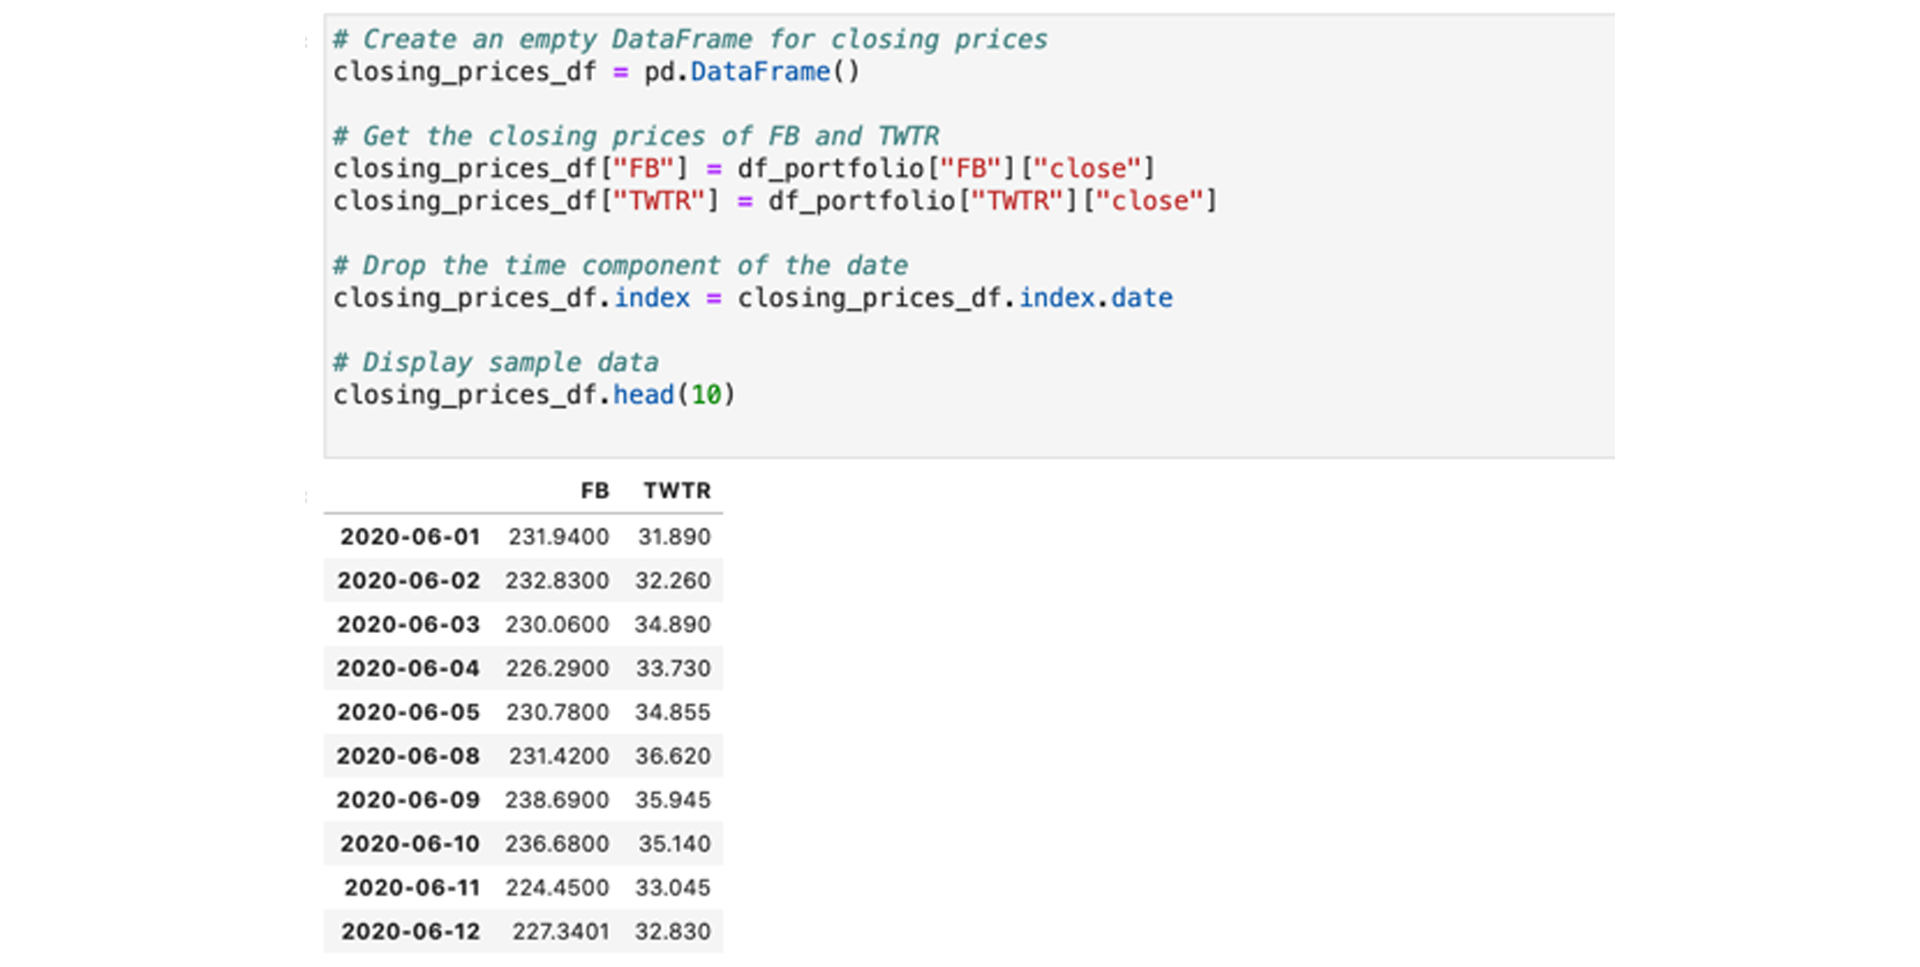

Next, we calculate the daily returns by using the Pandas `pct_change` function and then drop the first line of `NaN` values.

In [ ]:
# Compute daily returns
daily_returns_df = closing_prices_df.pct_change().dropna()

# Display sample data
daily_returns_df.head()

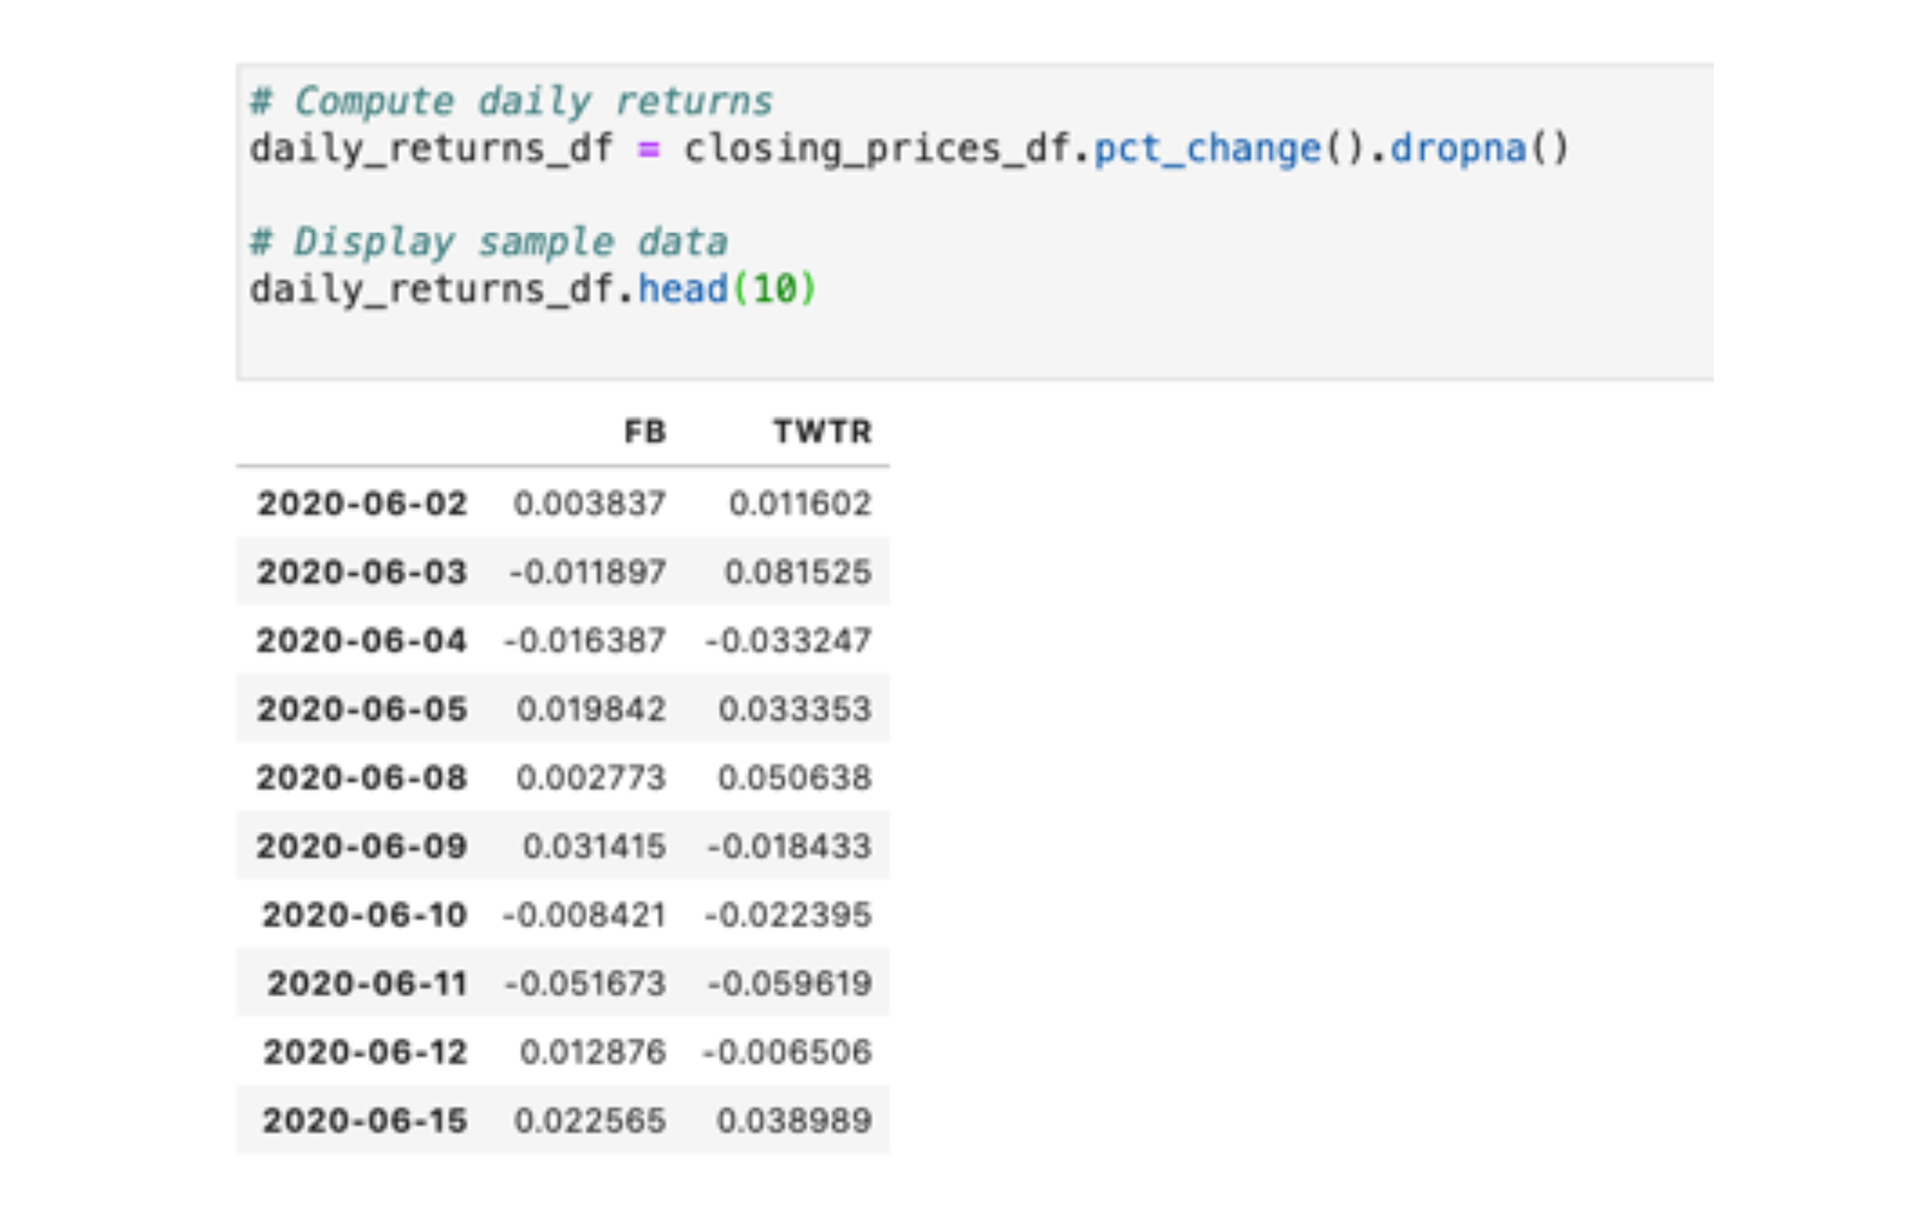

# Plot daily returns
daily_returns_df.plot(figsize=(10, 7), title="Daily Returns of FB and TWTR - June 2020", rot=90)

In [ ]:
daily_returns_df.plot(figsize=(10, 7), title="Daily Returns of FB and TWTR - June 2020", rot=90)

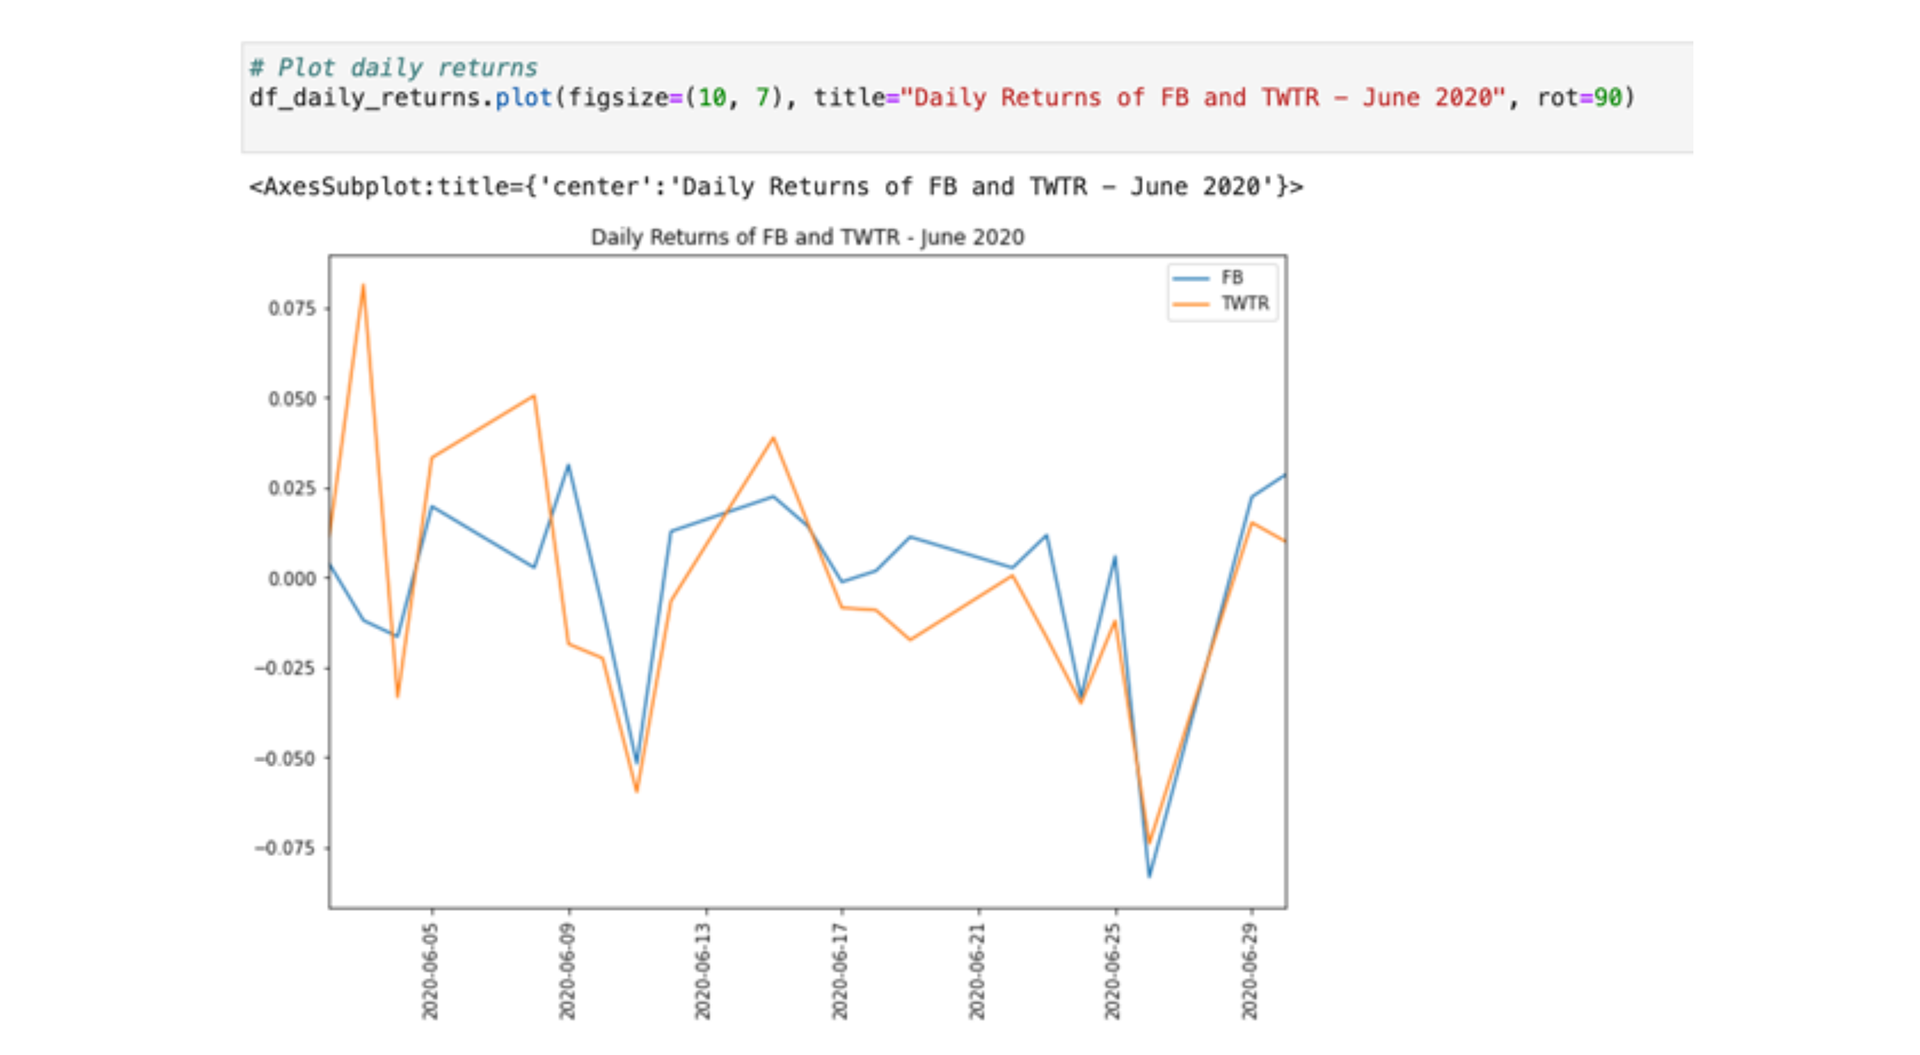

The plot indicates that Twitter had a bit more volatility early in the month but that the stocks performed similarly toward the end of the month.

This section covered a lot. We set up our tools, connected to the Alpaca SDK, got our data, and then analyzed it by calculating the daily returns and visualizing the results. Now, you need to apply what you just learned. In the following activity, you’ll work with the Alpaca API to analyze the financial performance of two stocks over the past year.

https://courses.bootcampspot.com/courses/800/pages/5-dot-1-10-activity-investment-valuations?module_item_id=235165